In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext memory_profiler
%reload_ext line_profiler
%pylab inline

import sys
try: sys.path.index('/ml.dev/bin')
except: sys.path.append('/ml.dev/bin')

from qore import *
from qoreliquid import *
from qorequant import QoreQuant
import pandas as p
import numpy as n
import mpld3
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5
from pylab import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
pairs = 'EUR_USD AUD_USD USD_CAD USD_CHF'.split(' ' )
pairs = ['EUR_USD', 'GBP_USD', 'AUD_USD', 'AUD_JPY', 'NZD_USD', 'NZD_EUR', 'USD_JPY',  'USD_CHF', 'USD_CAD','GBP_JPY', 'EUR_NZD', 'GBP_NZD', 'AUD_NZD', 'NZD_JPY']
pair = pairs[3]
granularities = list(p.DataFrame(['D','H4','H1','M30','M15','M5','M1','S10','S5']).sort(ascending=False).transpose().get_values()[0])
count = 200
plot=True
noUpdate=False

rcParams['figure.figsize'] = 12, 5
#rcParams['figure.figsize'] = 16, 5

qq = QoreQuant()
qq.qd.off()
qq.setVerbose(False)
qq.granularities = granularities
qq.pairs = pairs

#mpld3.enable_notebook()
mpld3.disable_notebook()

In [ ]:
import ujson
import numpy

ujson.dumps(numpy.min([1,2]))

In [ ]:
#%lprun -f qq.oq.updatePairGranularity -f qq.oq.appendHistoricalPrice -f qq.oq.getHistoricalPrice qq.oq.updatePairGranularity('EUR_USD', 'H1', noUpdate=False, plot=False)
#%prun qq.sweepChartsConstantGranularity(granularities[2], pairs)
%lprun -f qq.sweepChartsConstantGranularity -f qq.sweepCharts -f qq.visualizeVolume qq.sweepChartsConstantGranularity(granularities[5], pairs)
#qq.sweepChartsConstantGranularity(granularities[7], pairs, onlyTradedPairs=True)

In [ ]:
qq.oq.updateBarsFromOanda(pair=pair, granularities=' '.join([granularity]), plot=plot, noUpdate=noUpdate)
#qq.oq.dfa.keys()

In [ ]:
qq.sweepChartsConstantGranularity(granularities[2], pairs, onlyTradedPairs=True)

In [ ]:
#qq.sweepChartsConstantPair()
#qq.sweepChartsConstantGranularity()

In [ ]:
qq.sweepChartsConstantGranularity(granularities[0], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[1], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[2], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[3], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[4], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[5], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[6], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[7], pairs)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[8], pairs)

In [ ]:
currs = ['USD_CAD', 'USD_CHF','GBP_USD']

def findBasePair(curr):
    try:    return [currs[map(lambda x: x[0:3].lower() == curr.lower(), currs).index(True)], 1]
    except: ''
    try:    return [currs[map(lambda x: x[4:7].lower() == curr.lower(), currs).index(True)], 0]
    except: ''
findBasePair('gbp')

In [ ]:
ds = ['USD_JPY', 'na']
ds = list(n.unique(ds))
print ds
dss = ds.index('na')
print dss
ds.remove('na')
ds+ds

In [ ]:
print 
#df = qq.oq.syntheticCurrencyTable(p.DataFrame('CHF_JPY EUR_USD AUD_USD GBP_USD EUR_GBP'.split(' ')).ix[:,0])#['base']
df = qq.oq.syntheticCurrencyTable(p.DataFrame(list(p.read_csv('/mldev/bin/data/oanda/cache/instruments.csv').ix[:,'instrument'])).ix[:,0], homeCurrency='GBP')
df = p.DataFrame(df).set_index('instrument')
print p.DataFrame(df)

In [ ]:
df = p.read_csv('/mldev/bin/data/oanda/logs/kpql.equity.log.csv')
#df = df.convert_objects(convert_numeric=True)
#print df#[1]
#print df.ix[:,"accountId"]
df = df.set_index('ts')
df = df.ix[(df["accountId"] == 61519), :]
df['eq'] = df.ix[:, 'balance'] + df.ix[:, 'unrealizedPl']
df = df.ix[:, ['balance', 'marginAvail', 'marginUsed', 'realizedPl', 'unrealizedPl']]
#print df
dfn = normalizeme(df)
#dfn = sigmoidme(dfn)
dfn.plot(); show();
print df.tail(5)

In [ ]:
qq.update(pair='EUR_USD',granularity='M1')

In [ ]:
# spreads table
pair = 'CHF_JPY,EUR_USD'
#dfi = qq.oq.oanda2.get_instruments(qq.oq.aid, instruments=pair)
dfi = qq.oq.oanda2.get_instruments(qq.oq.aid, instruments=None)
dfi = p.DataFrame(dfi['instruments'])
dfi = dfi.set_index('instrument')
#print dfi
#df = qq.oq.oanda2.get_prices(instruments=pair)
df = qq.oq.oanda2.get_prices(instruments=','.join(list(dfi.index)))
df = p.DataFrame(df['prices'])
df['spread'] = abs(df['bid'] - df['ask'])
df = df.set_index('instrument')
df = df.combine_first(dfi)
df['spreadq'] = abs(df['spread'] / df['pip'])
df.sort('spreadq').ix[:,'spreadq']

In [ ]:
#qq = QoreQuant()
qq.oq.oanda2.get_trades(qq.oq.aid)

In [ ]:
qq.oq.gotoMarket()

In [ ]:
qq = QoreQuant()
df = qq.oq.oandaTransactionHistory(plot=False, startTs=0, fname='/home/qore/qorelogic/assets/sec-svn.git/assets/oanda/kpql/primary/e68e1395e67fdaf7ea752bc11df05f5c.csv')
df = df.bfill().ffill()
df = df.ix[:, :]
#df = df.ix[:, ['accountBalance']]
#dfp = df.ix[:, ['Balance']]
#dfp.plot(); show();

dfe = p.read_csv('/mldev/bin/data/oanda/logs/{0}.equity.log.csv'.format(qq.oq.oandaUsername))
#dfe = dfe.convert_objects(convert_numeric=True)
#print dfe#[1]
#print dfe.ix[:,"accountId"]
dfe = dfe.set_index('ts')
dfe = dfe.ix[(dfe["accountId"] == 61519), :]
dfe['eq'] = dfe.ix[:, 'balance'] + dfe.ix[:, 'unrealizedPl']
dfe = dfe.ix[:, ['balance', 'marginAvail', 'marginUsed', 'realizedPl', 'unrealizedPl']]
dfe['Balance'] = dfe['balance']
#print dfe
headers = ['Balance','marginAvail', 'marginUsed', 'realizedPl', 'unrealizedPl']
dfn = normalizeme(dfe)
#dfn = sigmoidme(dfn)
dfn.ix[:,headers].plot(); show();
#print dfe.tail(5)

df['ts1'] = qq.oq.oandaToTimestamp(df['time'])
df['ticketno'] = df.index
df = df.set_index('ts1')
df = df.combine_first(dfe)#.bfill().ffill()
dfp = df.ix[qq.oq.oandaToTimestamp('2015-09-06T20:55:29.000000Z'):, headers]
#print dfp
dfp = normalizeme(dfp)
#dfp = sigmoidme(dfp)
dfp.plot(); show();

In [ ]:
# ONLY TRADED PAIRS
#========================================///////========================================//
qq.sweepChartsConstantGranularity(granularities[0], pairs, onlyTradedPairs=True)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[1], pairs, onlyTradedPairs=True)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[2], pairs, onlyTradedPairs=True)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[3], pairs, onlyTradedPairs=True)

In [ ]:
qq.sweepChartsConstantGranularity(granularities[4], pairs, onlyTradedPairs=True)

In [ ]:
qq = QoreQuant()
qq.setVerbose(False)
plot=False
df = qq.oq.updatePairGranularity('EUR_USD', 'S5', plot=plot)
#df = qq.oq.dfa['EUR_USD']['S5']
list(df.index[n.isnan(df.ix[:,'volume'].get_values())])
#print df
#appendHistoricalPrice

#df = qq.oq.updatePairGranularity('EUR_USD', 'M15')
#qq.oq.oanda2.get_history(instrument='EUR_USD', granularity='M15', start='2015-04-24T18:45:00.000000Z', end='2015-07-29T20:30:00.000000Z')
df = qq.oq.oanda2.get_history(instrument='EUR_USD', granularity='M15', count=50)
df = p.DataFrame(df['candles'])
#df

In [ ]:
qq.sweepChartsConstantGranularity(granularities[5], pairs, onlyTradedPairs=True)

In [ ]:
qq.vizVolume(0,8)

In [ ]:
qq.vizVolume(0,0)

In [ ]:
qq.vizVolume(1,1)

In [ ]:
qq.vizVolume(2,2)

'M5'
'M5'


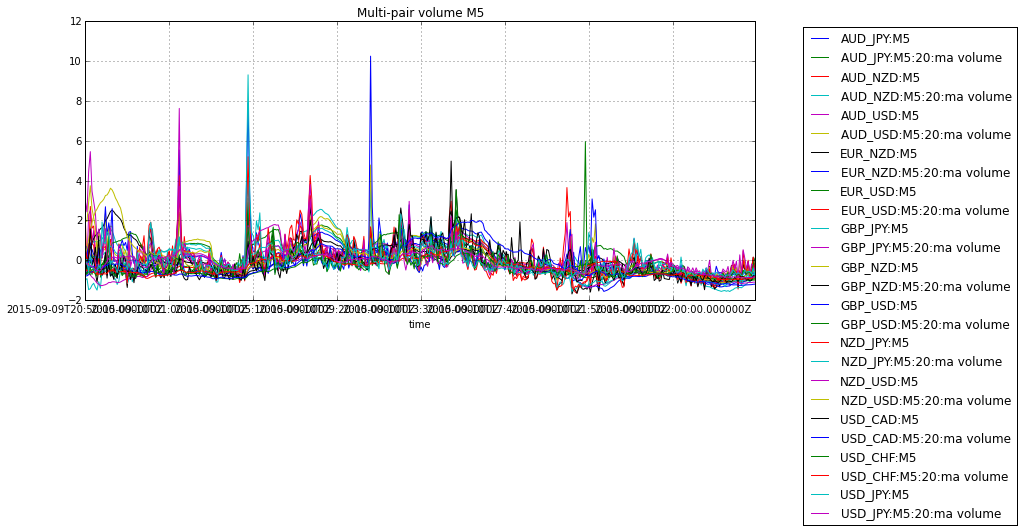

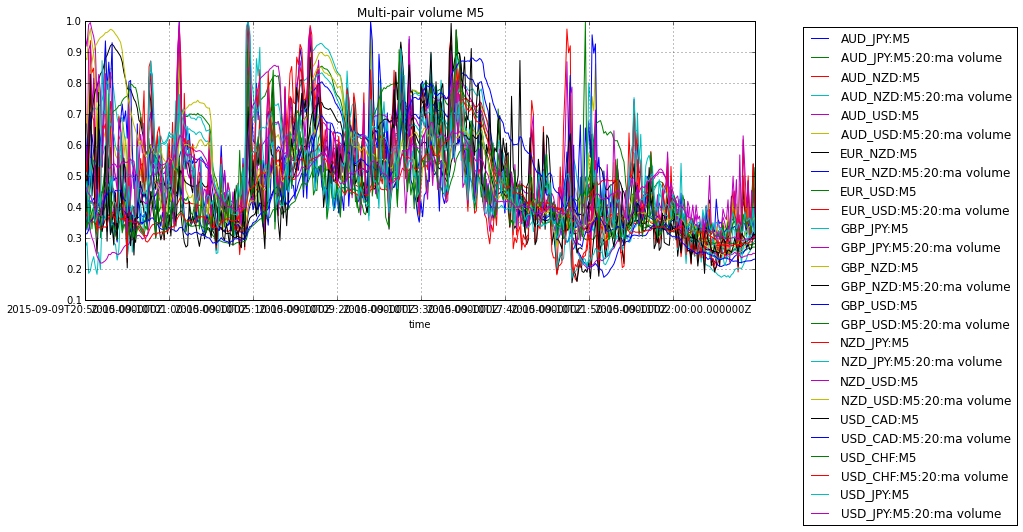

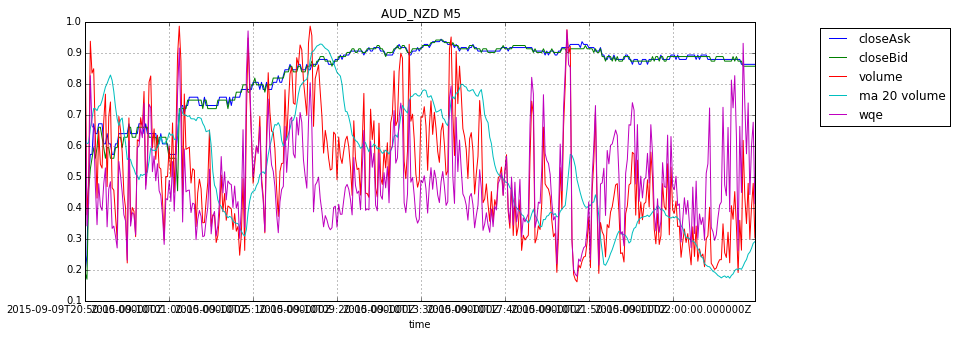

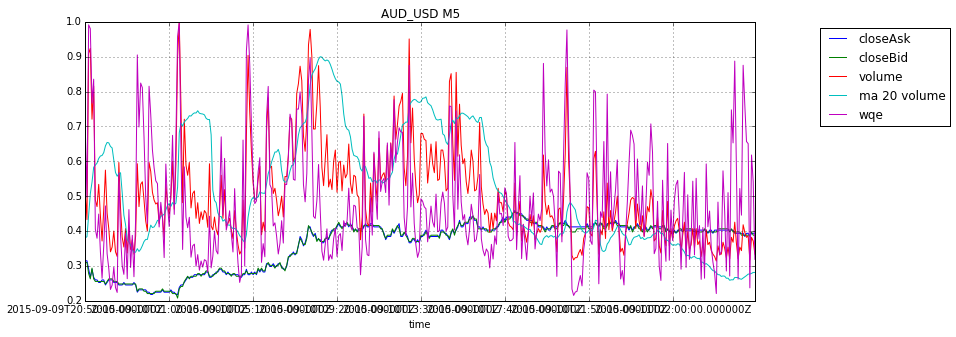

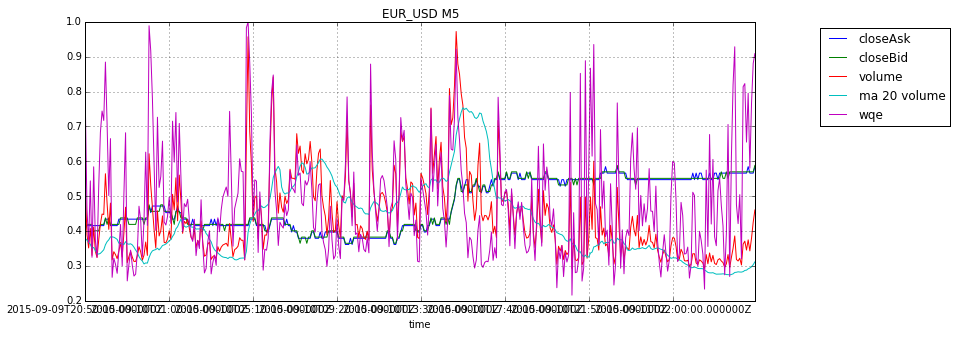

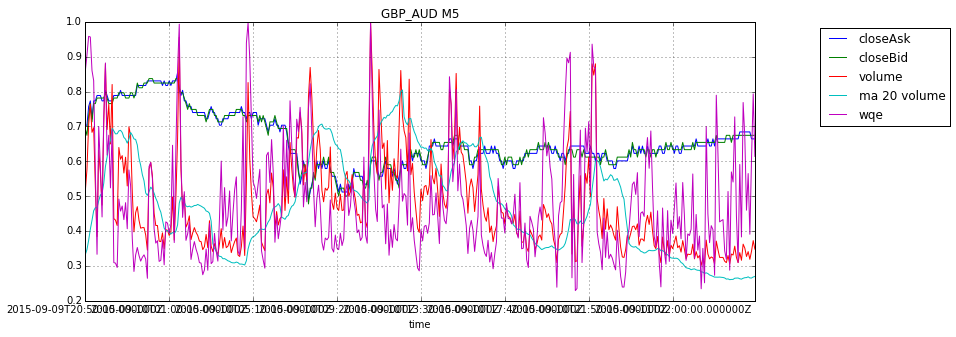

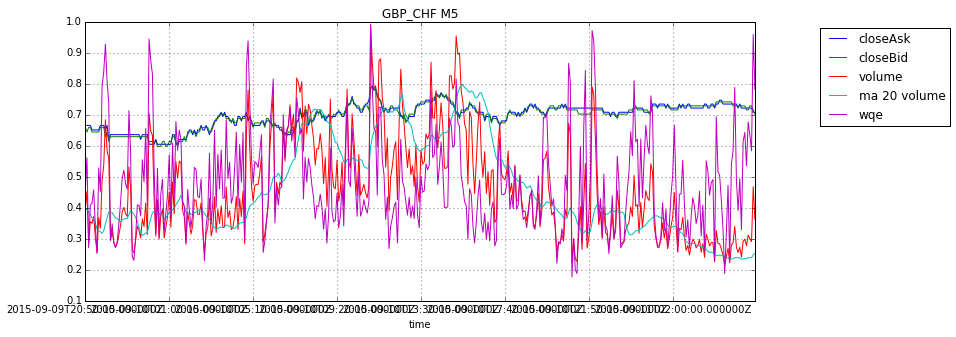

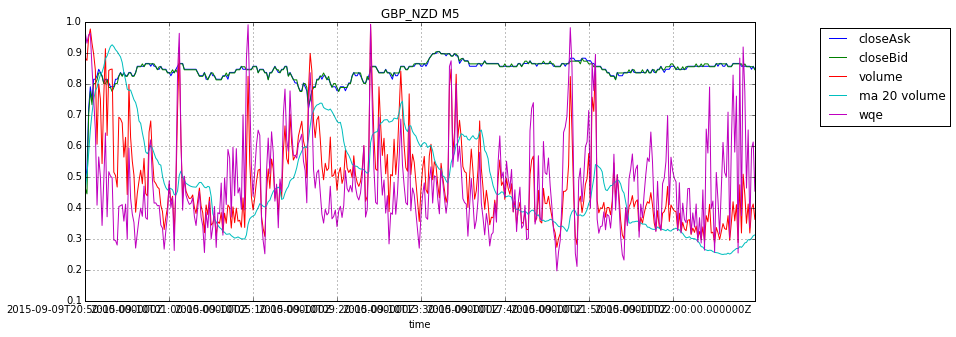

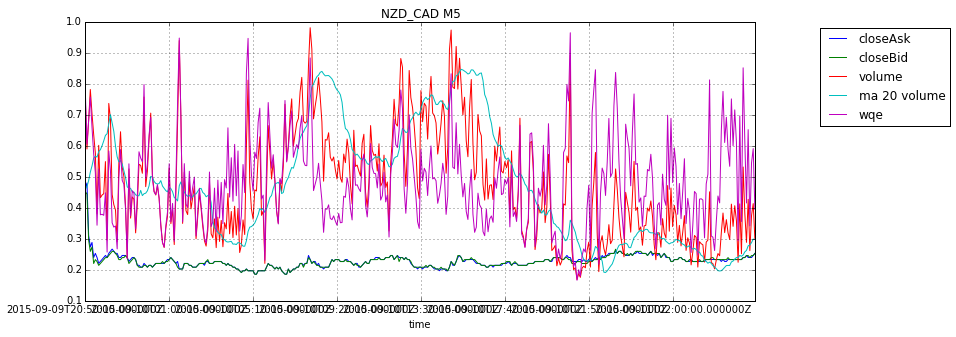

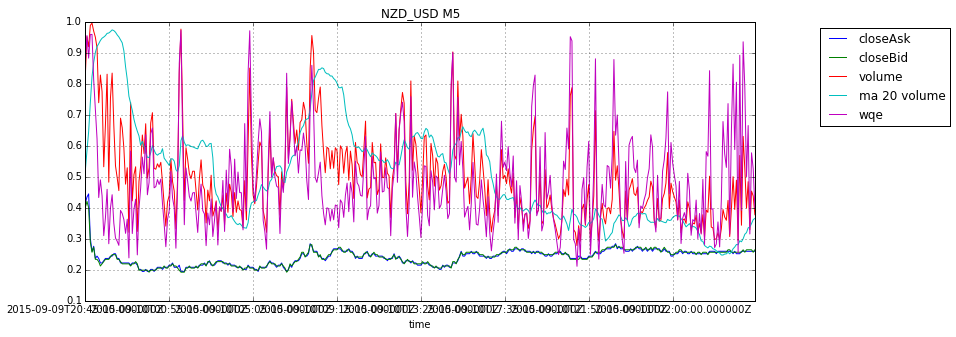

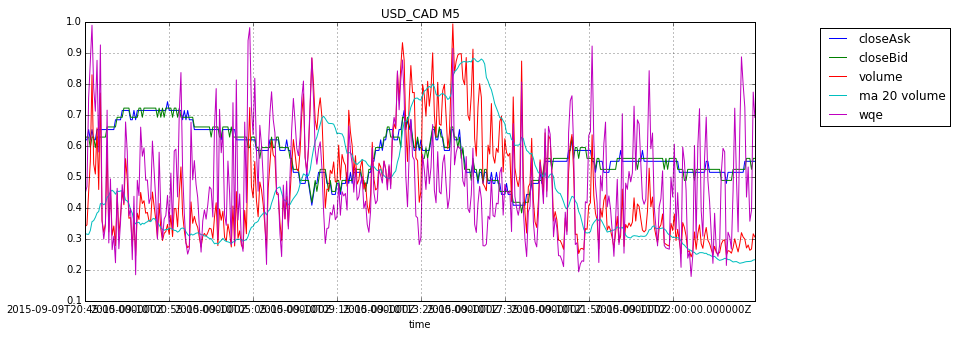

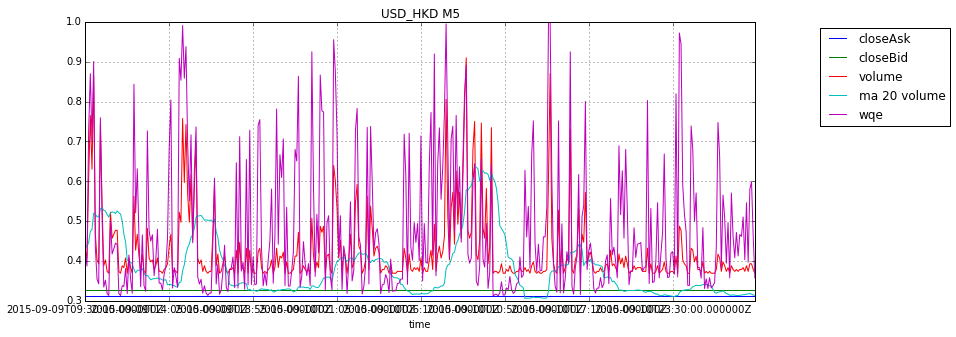

In [3]:
qq.vizVolume(3,3)

In [ ]:
qq.vizVolume(4,4)

In [ ]:
qq.vizVolume(4, 6)

In [ ]:
babysitTrades2(qq, acc)

In [ ]:
acc = qq.oq.oanda2.get_account(qq.oq.aid)
print acc
bal = acc['balance']
targetPl = bal * 1. / 100
unrealizedPl = acc['unrealizedPl']
print unrealizedPl
print unrealizedPl / bal * 100
print targetPl
if unrealizedPl >= targetPl:
    print 'yay!'
    #qq.oq.oanda2.modify_trade(qq.oq.aid, tid, trailingStop=10)    
else:
    print 'ah damn!'

In [ ]:
import time

df = qq.oq.oanda2.get_trades(qq.oq.aid)['trades']

#df = p.DataFrame(df)
#print df

for c in xrange(10):    
    
    monpos2(df, qq.oq.oanda2.get_prices(instruments='EUR_USD')['prices'][0])
    
    break
    time.sleep(1)

In [ ]:
df = p.Series([1,3,4,5]).to_frame('123')
print type(df['123'])
print type(df)

In [ ]:
#n.empty(3)
res = False
res = p.DataFrame([])
print res.shape
#if res == n.empty(res.shape):
if res.get_values() == n.empty(res.shape):
    print 1
else:
    print 0

In [ ]:
qq = QoreQuant()
qq.
qq.update(pair='EURUSD', granularity='M15')

In [ ]:
qq = QoreQuant()
qq.showLevels()

In [ ]:
import numpy as np
a = np.array([[1, 1],
              [0, 1]])
n = 5
np.kron(a, np.ones((n,n)))

In [ ]:
grid = np.random.random((10,10))
print grid
imshow(grid, extent=[0,100,0,1], aspect=100)
title('Manually Set Aspect')
tight_layout()
show()

# source: http://matplotlib.org/examples/pylab_examples/hist2d_demo.html
x = randn(1000)
y = randn(1000)+5

#normal distribution center at x=0 and y=5
scatter(x,y)
hist2d(x,y,bins=20)
show()

In [ ]:
from qoreliquid import QoreQuant
qq = QoreQuant()
df = qq.analyseInvestingTechnical(showPlot=True)
df.transpose()